In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\saura\Downloads\Bengaluru_House_Data.csv')

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:

df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# handle missing value


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
# handle scoiety null value
mode_society=df.society.mode()
mode_society

0    GrrvaGr
Name: society, dtype: object

In [8]:
df2=df['society'].fillna(mode_society[0],inplace=True)

In [9]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [10]:
bath_mean=df.bath.mean()
bath_mean

2.6926096474673513

In [11]:
bath_median=df.bath.median()

In [12]:
bath_median

2.0

In [13]:
df2=df['bath'].fillna(bath_median,inplace=True)

In [14]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
society           0
total_sqft        0
bath              0
balcony         609
price             0
dtype: int64

In [15]:
mean_balcony=df.balcony.mean()

In [16]:
mean_balcony

1.5843757375501535

In [17]:
median_balcony=df.balcony.median()

In [18]:
median_balcony

2.0

In [19]:
df2=df['balcony'].fillna(median_balcony,inplace=True)

In [20]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [21]:
df2=df['location'].fillna(method='backfill',inplace=True)

In [22]:
df.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [23]:
df.isnull().sum()

area_type        0
availability     0
location         0
size            16
society          0
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [24]:
df2=df['size'].fillna(method='backfill',inplace=True)

In [25]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

<AxesSubplot:>

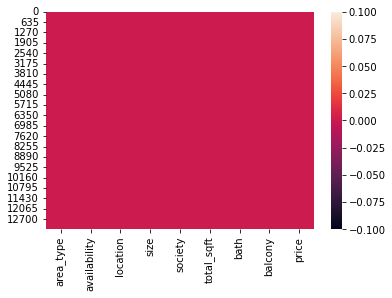

In [26]:
#representing by graph
sns.heatmap(df.isnull())

In [27]:
df.corr()

,bath,balcony,price
bath,1.000000,0.207970,0.454449
balcony,0.207970,1.000000,0.124951
price,0.454449,0.124951,1.000000


<AxesSubplot:>

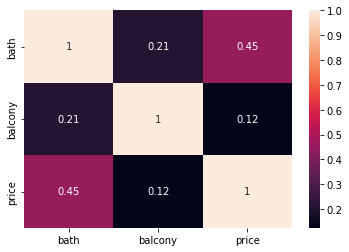

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
# statical analysis
df.describe()

,bath,balcony,price
count,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627
std,1.338754,0.803067,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [30]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [31]:
df[df['price'].max()==df['price']][['price','availability','location','size']]

,price,availability,location,size
13067,3600.0,Ready To Move,Defence Colony,10 Bedroom


In [32]:
df[df['price'].min()==df['price']][['price','availability','location','size']]

,price,availability,location,size
10526,8.0,Ready To Move,Yelahanka New Town,1 BHK


In [33]:
#find max number of bath and what is price of there
df[df['bath'].max()==df['bath']][['price','bath']]

,price,bath
4684,660.0,40.0


In [34]:
# find max balcony and what is price there?
df[df['balcony'].max()==df['balcony']][['price','balcony']].head()



,price,balcony
1,120.00,3.0
2,62.00,3.0
11,295.00,3.0
17,60.00,3.0
33,57.39,3.0


<AxesSubplot:xlabel='balcony', ylabel='bath'>

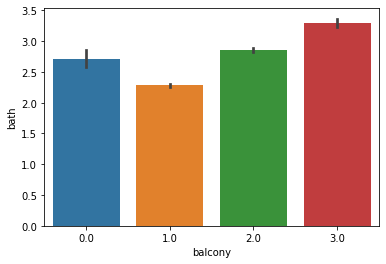

In [35]:
sns.barplot(x='balcony',y='bath',data=df)

# Enoding

In [36]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [37]:
df.head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
df['area_type']=le.fit_transform(df['area_type'])

In [41]:
df['availability']=le.fit_transform(df['availability'])

In [42]:
df['location']=le.fit_transform(df['location'])

In [43]:
df['society']=le.fit_transform(df['society'])

In [44]:
df['total_sqft']=le.fit_transform(df['total_sqft'])

In [45]:
df['size']=le.fit_transform(df['size'])

In [46]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,13,464,70,2.0,1.0,39.07
1,2,80,317,19,2439,1288,5.0,3.0,120.00
2,0,80,1179,16,806,514,2.0,3.0,62.00
3,3,80,757,16,2186,602,3.0,1.0,95.00
4,3,80,716,13,806,239,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,0,80,1252,22,209,1499,4.0,0.0,231.00
13316,3,80,1004,18,806,1535,5.0,2.0,400.00
13317,0,80,972,13,1216,172,2.0,1.0,60.00
13318,3,32,907,18,2205,1680,4.0,1.0,488.00


In [47]:
df.shape

(13320, 9)

In [48]:
x=df.drop('price',axis=1)

In [49]:
x.count()

area_type       13320
availability    13320
location        13320
size            13320
society         13320
total_sqft      13320
bath            13320
balcony         13320
dtype: int64

In [50]:
y=df['price'].count()

In [51]:
y

13320

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=3)

TypeError: Singleton array 13320 cannot be considered a valid collection.